In [24]:
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import train_test_split

In [25]:
dataset = pd.read_csv("House-Price.csv")

In [26]:
dataset.head(3)

,number_of_bedrooms,number_of_bathrooms,living_area,lot_area,number_of_floors,condition_of_the_house,Area_of_the_house,Area_of_the_basement,Built_Year,Renovation_Year,Number_of_schools_nearby,Distance_from_the_airport,Price
0,5,3,3650,9050,2,5,3370,280,1921,0,2,58,2380000
1,4,3,2920,4000,2,5,1910,1010,1909,0,2,51,1400000
2,5,3,2910,9480,2,3,2910,0,1939,0,1,53,1200000


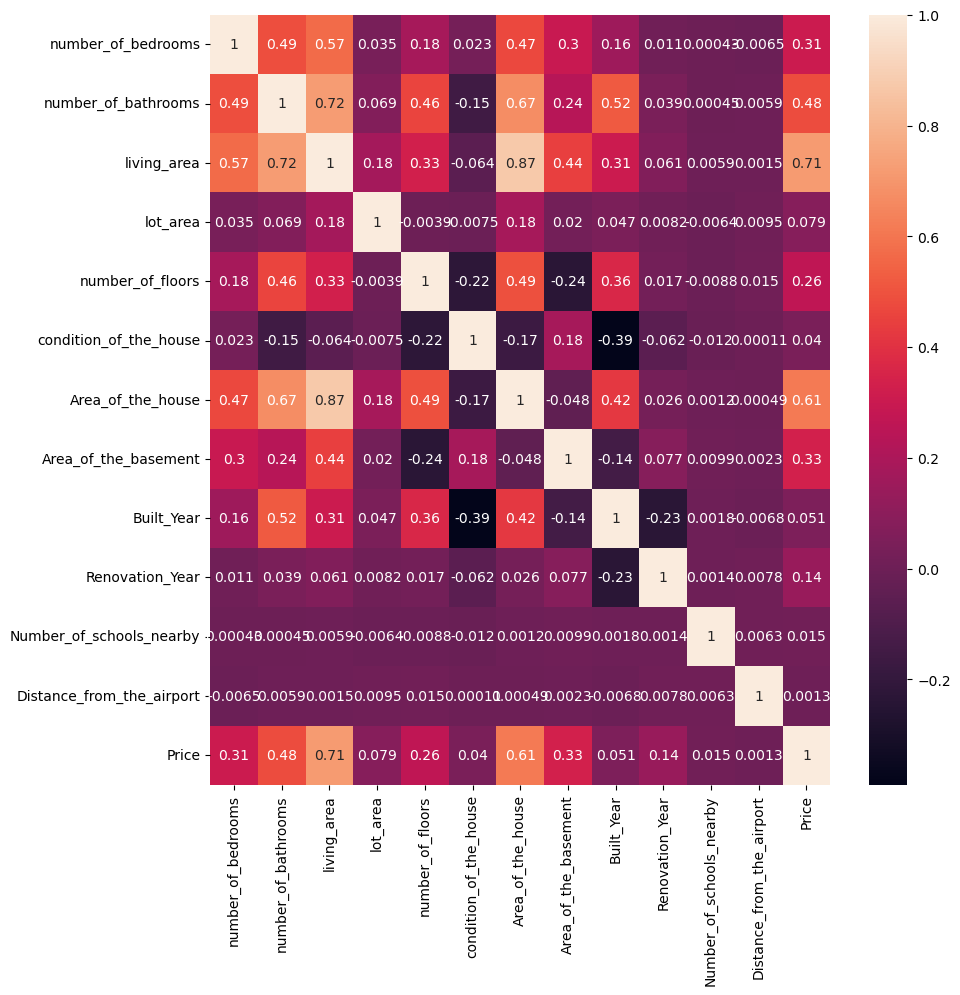

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

In [32]:
x = dataset.iloc[:,:-1]
y = dataset["Price"]

In [33]:
sc = StandardScaler()
sc.fit(x)
x= pd.DataFrame(sc.transform(x),columns=x.columns)

In [35]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 ,random_state = 42)

In [37]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# linear regression

In [38]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100

56.87637852243075

In [59]:
print(mean_squared_error(y_test,lr.predict(x_test)))
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

54864489001.22952
160121.94660470603
234231.69939448743


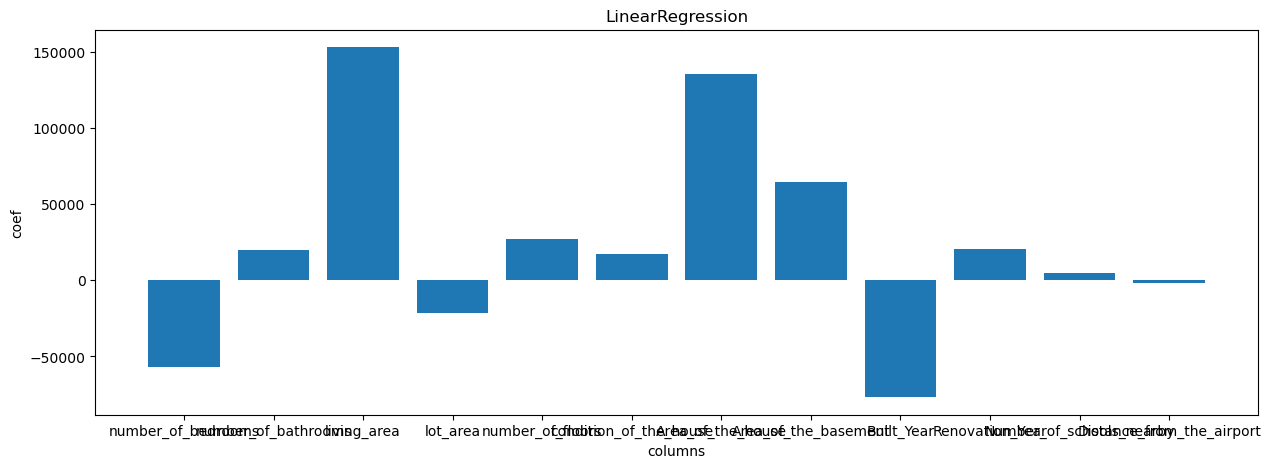

In [51]:
plt.figure(figsize=(15,5))
plt.bar(x.columns , lr.coef_)
plt.title("LinearRegression")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

# lasso L1

In [49]:
la = Lasso(alpha=0.5)
la.fit(x_train,y_train)
la.score(x_test,y_test)*100

C:\Users\Avishank Dwivedi\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.245e+12, tolerance: 1.321e+11
  model = cd_fast.enet_coordinate_descent(


56.87641187349624

In [60]:
print(mean_squared_error(y_test,la.predict(x_test)))
print(mean_absolute_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))

54864446569.97947
160121.7468808621
234231.6088190906


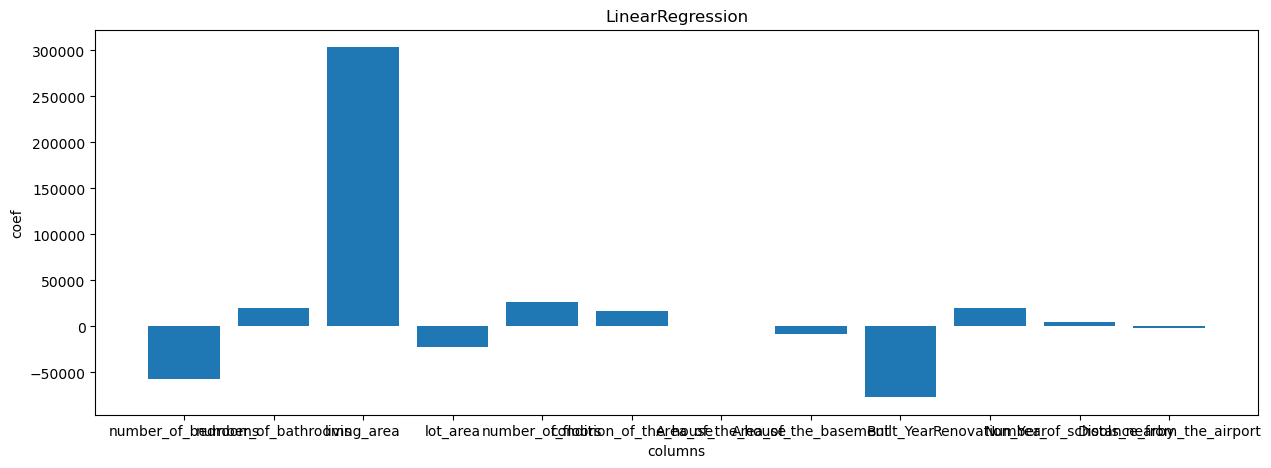

In [52]:
plt.figure(figsize=(15,5))
plt.bar(x.columns , la.coef_)
plt.title("LinearRegression")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

# Ridge

In [56]:
ri = Ridge(alpha = 10)
ri.fit(x_train,y_train)
ri.score(x_test,y_test)*100

56.880182329369134

In [61]:
print(mean_squared_error(y_test,ri.predict(x_test)))
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test))))

54859649567.13786
160082.42714112948
234221.36872441391
